In [1]:
# Generic Libraries
from PIL import Image
import os
import pandas as pd
import numpy as np
import re,string,unicodedata

#Tesseract Library
import pytesseract

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Garbage Collection
import gc

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract

<class 'numpy.ndarray'>
3456 4608 3


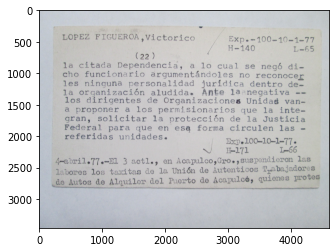

In [2]:
# Leemos imagen
path = "../datos/Fichas_manual/Ficheros_Represores_Lopez_Figueroa_Victorico_IMG_6646.JPG"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#fig = plt.figure(figsize = [10,10])
height,width,channel = img.shape
plt.imshow(img)
print(type(img))
print(height,width,channel)

In [3]:
text = pytesseract.image_to_string(img)

In [4]:
text

'_WOPEZ FICUEROR ,victorico a Exp: 100-10\n(22)\n\nla citada Dependencia, a lo cual se negé di-\ncho funcionario argumentdndoles no reconocer\nles ninguna personalidad juridica dentro de-\nla organizacién aludida. Ante lasnegativa --\nlos diricgentes de Organizaciones Unidas van-\na proponer a los permisionarios que la inte-\ngran, solicitar la protecci6n de la Justicia\n\nFederal para que en esa forma circulen las -\nreferidas unidades.\n\nWUxDe 1LO00—10—1—77 °\n\n/ #171 L-66\n‘dpebril.77.-El 3 actle, en AcapulcosGros,suspendieron las\nlabores los taxitas de la Unién de Autenticos T,#bajadores ©\nde Autos de Alquiler del Puerto de Acapulos, houmene\n\n \n    \n\n \n\x0c'

In [22]:
def convierte_minusculas(texto):
    """Convierte a minúsculas todo el texto
    :param texto: texto a convertir
    :return: texto convertido
    """
    
    return texto.lower()

In [39]:
def quitar_caracteres_especiales(phrase):
    """
    :param phrase:
    :return:
    """
    caracteres_especiales = "’'?!,.():;-#\/°"
    # quita dobles espacios y lo hace 1
    phrase = re.sub(' +', ' ', phrase)
    
    phrase = re.sub("á", "a", phrase)
    phrase = re.sub("é", "e", phrase)
    phrase = re.sub("í", "i", phrase)
    phrase = re.sub("ó", "o", phrase)
    phrase = re.sub("ú", "u", phrase)
    
    phrase = re.sub("\n", "", phrase)
    
    # quita los caracteres especiales
    regex = re.compile('[%s]' % re.escape(caracteres_especiales))
    
    phrase = regex.sub('', phrase)

    return phrase

In [40]:
def quitar_nonascii(phrase):
    """
    :param phrase:
    :return:
    """
    return phrase.encode('ascii', errors='ignore').decode('utf-8')

In [41]:
text = convierte_minusculas(text)

In [56]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/usr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/usr/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
text = quitar_caracteres_especiales(text)

In [46]:
text = quitar_nonascii(text)
text

'_wopez ficueror victorico a exp 1001022la citada dependencia a lo cual se nege dicho funcionario argumentdndoles no reconocerles ninguna personalidad juridica dentro dela organizacien aludida ante lasnegativa los diricgentes de organizaciones unidas vana proponer a los permisionarios que la integran solicitar la protecci6n de la justiciafederal para que en esa forma circulen las referidas unidadeswuxde 1lo0010177  171 l66dpebril77el 3 actle en acapulcosgrossuspendieron laslabores los taxitas de la unien de autenticos tbajadores de autos de alquiler del puerto de acapulos houmene \x0c'

In [69]:
stopwords_propios = ['la', 'a', 'lo', 'el', 'les', 'los', 'las', 'de', 'del', 
             'al', 'que', 'para', 'en', 'se']

In [70]:
def quitar_stopwords(texto):
    
    text_tokens = word_tokenize(texto)

    tokens_without_sw = [word for word in text_tokens if not word in stopwords_propios]

    filtered_sentence = (" ").join(tokens_without_sw)
    
    return filtered_sentence


In [72]:
text = quitar_stopwords(text)